In [1]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [2]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [3]:
#using closed cloumn alone we see what happens...

df1 = df.reset_index()['close']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.6+ KB


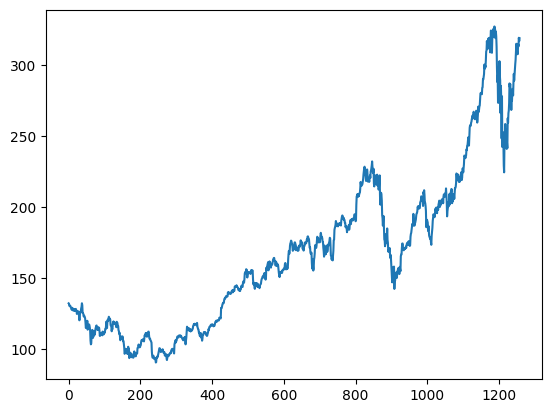

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
#LSTM are sensitive to the scale of data so min-max scaler is important...
import numpy as np
from sklearn.preprocessing import MinMaxScaler as MMS

scaler = MMS(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [6]:
#now spliting the daat set into training and test set .........
 
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
test_data.size

315

In [11]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [21]:
# LSTM architectures are capable of learning long-term dependencies in sequential data

# Bi LSTMs are made up of two LSTM networks, one that processes the input sequence in the forward direction and one that processes
# the input sequence in the backward direction. 
# The outputs of the two LSTM networks are then combined to produce the final output.
# LSTM models, including Bi LSTMs, have demonstrated state-of-the-art performance across various tasks such as 
# machine translation, speech recognition, and text summarization.

# The fact that time series data frequently display patterns or trends across time, such as seasonality or cyclical patterns, 
# is an essential feature associated with it. To make predictions or learn more about the underlying processes or occurrences being 
# observed, these patterns can be analyzed and modeled.

# Recurrent Neural Networks (RNN) model the temporal dependencies present in the data as it contains an implicit memory of previous inputs. 
# Hence, time series data being sequential in nature is often used in RNN. For working with time series data in RNNs, TensorFlow provides a 
# number of APIs and tools, like tf.keras.layers.RNN API, which allows to create of unique RNN cell classes and use them with data. 
# Several RNN cell types are also supported by this API, including Basic RNN, LSTM, and GRU.

# To get a better intuition on RNN let’s take the example of text classification, for this task we can use the classic machine learning 
# algorithms like naive bayes but the problem with this algorithm, it takes a sentence as a set of independent words and precisely the 
# frequency of each word without worrying about the composition of words or the order of words in a sentence which makes a huge difference 
# to form the meaning of a sentence. RNN unlike those classic algorithms, works well on sequence data because it takes the word i as input and 
# combine with the output of word i-1, the same thing would be applied for word i+1 and this is the reason it’s called recurrent neural network 
# because clearly the neural network apply the same operations on each word i of the sentence.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

C:\Users\saksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0299 - val_loss: 0.0953
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0047 - val_loss: 0.0276
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0020 - val_loss: 0.0080
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0014 - val_loss: 0.0080
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 9.7285e-04 - val_loss: 0.0097
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 9.4523e-04 - val_loss: 0.0101
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0010 - val_loss: 0.0075
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 8.7362e-04 - val_loss: 0.0077
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0010 - val_loss: 0.0078
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 8.4222e-04 - val_loss: 0.0077
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 7.6655e-04 - val_loss: 0.0113
Epoch 12/100
14/14 ━━━━━━━━━━━━━

27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


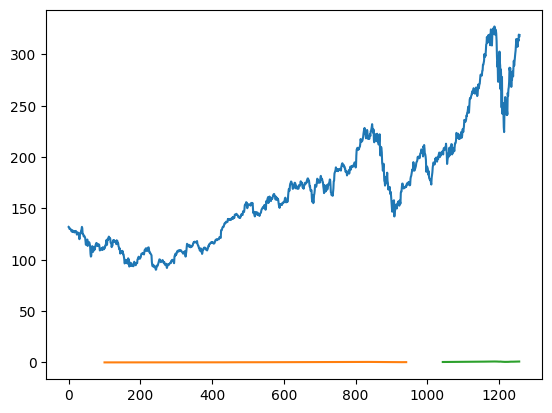

In [24]:
import tensorflow as tf

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
x_input=test_data[215:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

# making predictions for mext 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9540083]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.9

In [30]:
# So we got the predicted list as below:
lst_output

[[0.9540082812309265],
 [0.9538010358810425],
 [0.9502872824668884],
 [0.9457777738571167],
 [0.9413827061653137],
 [0.9376679062843323],
 [0.9348765015602112],
 [0.9330151677131653],
 [0.9319075345993042],
 [0.9312562346458435],
 [0.9307037591934204],
 [0.9298969507217407],
 [0.9285387396812439],
 [0.9264229536056519],
 [0.9234511852264404],
 [0.9196301102638245],
 [0.9150537848472595],
 [0.9098737835884094],
 [0.9042673707008362],
 [0.8984068632125854],
 [0.8924340009689331],
 [0.8864447474479675],
 [0.8804835677146912],
 [0.874545156955719],
 [0.8685836791992188],
 [0.8625255823135376],
 [0.8562847375869751],
 [0.8497760891914368],
 [0.8429263830184937],
 [0.8356815576553345]]

In [ ]:
### now we have other type of specialized models to work on time series data, more on these below:

# Autoregressive models, often abbreviated as AR models, are a fundamental concept in time series analysis and forecasting. 
# Autoregressive models belong to the family of time series models. These models capture the relationship between an observation and 
# several lagged observations (previous time steps). The core idea is that the current value of a time series can be expressed as a 
# linear combination of its past values, with some random noise.
# Autocorrelation plots are a commonly used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations 
# for data values at varying time lags.

# Recently, in an attempt to develop a model that could capture seasonality in time-series data, Facebook developed the 
# famous Prophet model that is publicly available for everyone. We will use this state-of-the-art model: the Prophet model. 
# Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing additive regression models. 
# The mathematical equation behind the Prophet model is defined as:

# y(t) = g(t) + s(t) + h(t) + e(t) ---> read more here: https://www.kaggle.com/code/gauravduttakiit/predicting-stock-prices-using-facebook-s-prophet
